In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Using seaborn's car-crashes data

In [2]:
df = sns.load_dataset('car_crashes')
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


# 3D plot by plotly

In [3]:
import plotly.offline as py
import plotly.graph_objs as go

py.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=df.alcohol,
    y=df.speeding,
    z=df.total,
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.1
        ),
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
    zaxis=dict(
        type='liner',
        autorange=True
    )
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# 2D contour plot (griddata)

<a list of 8 text.Text objects>

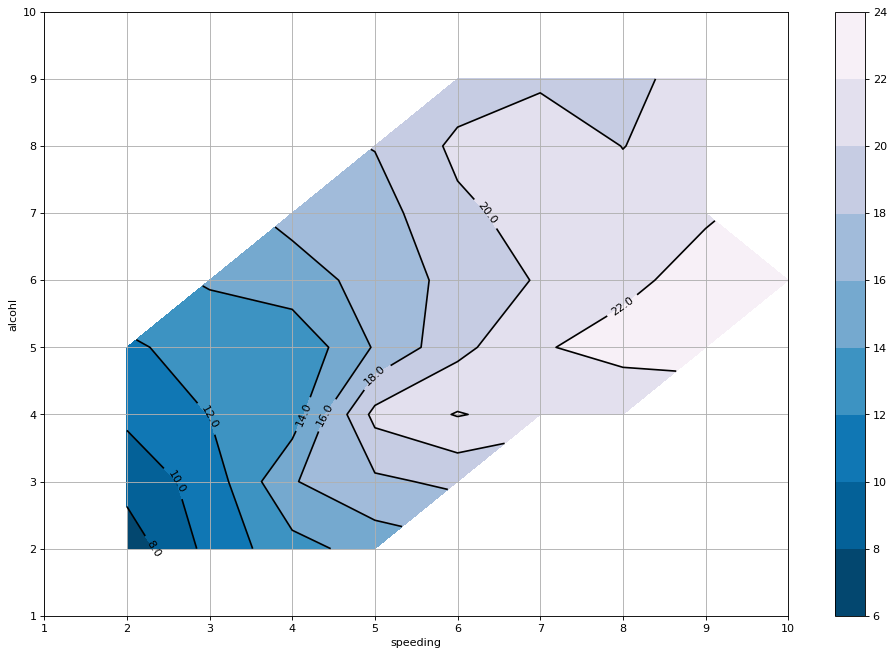

In [4]:
from matplotlib import cm
import matplotlib.mlab as mlab

ngridx = 10
ngridy = 10

x = df.alcohol
y = df.speeding
z = df.total

# griddata and contour.
xi = np.linspace(1, 10, ngridx)
yi = np.linspace(1, 10, ngridy)
zi = mlab.griddata(x, y, z, xi, yi, interp='linear')

plt.figure(figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.grid(True, which='both')

Cntf0 = plt.contourf(xi, yi, zi, 10, cmap=cm.PuBu_r)
Cnt0 = plt.contour(xi, yi, zi, 10, colors='black')
plt.colorbar(Cntf0)
plt.xlabel('speeding')
plt.ylabel('alcohl')
plt.clabel(Cnt0, inline=1, fontsize=10, fmt='%1.1f')

# 2D contour plot (tricontour)

<a list of 15 text.Text objects>

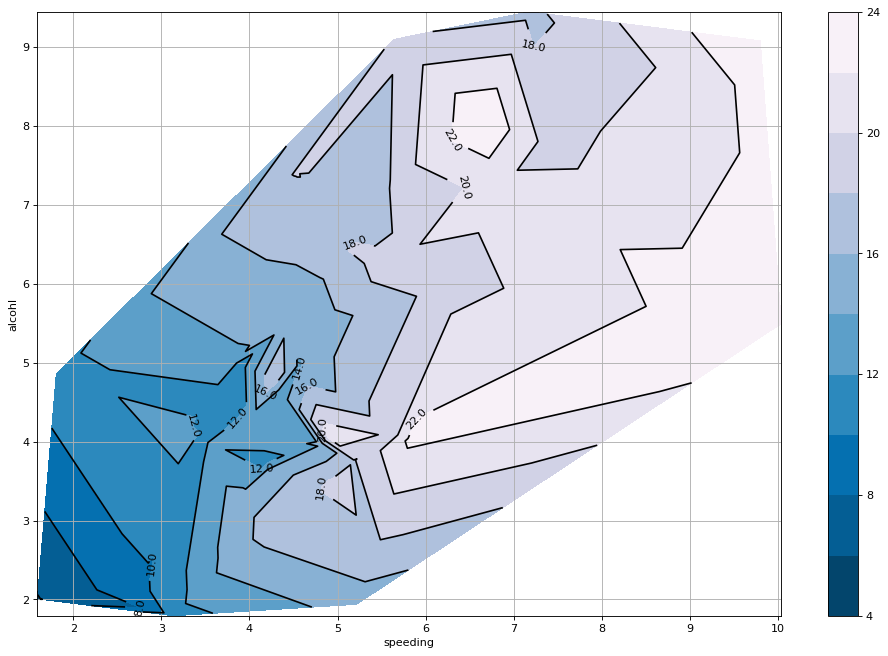

In [5]:
import matplotlib.tri as tri

# tricontour.
triang = tri.Triangulation(x, y)

plt.figure(figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.grid(True, which='both')

Cntf1 = plt.tricontourf(x, y, z, 10, cmap=cm.PuBu_r)
Cnt1 = plt.tricontour(x, y, z, 10, colors='black')

plt.colorbar(Cntf1)
plt.xlabel('speeding')
plt.ylabel('alcohl')
plt.clabel(Cnt1, inline=1, fontsize=10, fmt='%1.1f')